# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [1]:
from model import CA_rules, CA_grid
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics 
import scipy.stats


## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

## <font color = LightBlue > **Water-Solute Grid** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

In [4]:
from analysis import calculate_attributes

# Initialization parameters
start_value = 0
end_value = 1
step_size = 0.25
pbw_rates = np.arange(start_value, end_value + step_size, step_size)
num_runs = 5

results_solute = []

for _ in range(num_runs):
    print(f"Run number {_ + 1}")
    for pbw in pbw_rates:
        print(f"Running simulation at pbw = {pbw}")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=pbw)
        final_grid = ca_rules.generate_simulation()
        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        output = np.array([f_o, f_1, f_2, f_3, f_4])
        results_solute.append(output)

        # plt.imshow(final_grid)
        # plt.show()
        
results_solute = np.array(results_solute)
print(results_solute)


Run number 1
Running simulation at pbw = 0.0
Running simulation at pbw = 0.25
Running simulation at pbw = 0.5
Running simulation at pbw = 0.75
Running simulation at pbw = 1.0
Run number 2
Running simulation at pbw = 0.0
Running simulation at pbw = 0.25
Running simulation at pbw = 0.5
Running simulation at pbw = 0.75
Running simulation at pbw = 1.0
Run number 3
Running simulation at pbw = 0.0
Running simulation at pbw = 0.25
Running simulation at pbw = 0.5
Running simulation at pbw = 0.75
Running simulation at pbw = 1.0
Run number 4
Running simulation at pbw = 0.0
Running simulation at pbw = 0.25
Running simulation at pbw = 0.5
Running simulation at pbw = 0.75
Running simulation at pbw = 1.0
Run number 5
Running simulation at pbw = 0.0
Running simulation at pbw = 0.25
Running simulation at pbw = 0.5
Running simulation at pbw = 0.75
Running simulation at pbw = 1.0
[[7.90000000e+01 8.14566363e-03 1.43747005e-03 4.79156684e-04
  0.00000000e+00]
 [8.10000000e+01 7.66650695e-03 1.43747005e-0

In [1]:

print(results_solute[::5, 0])  # This is the f_o_solute values at pbw=0 for each run
print(results_solute[1::5, 0])  # This is the f_o_solute values at pbw=0.25 for each run
print(results_solute[2::5, 0])  # This is the f_o_solute values at pbw=0.5 for each run
print(results_solute[3::5, 0])  # This is the f_o_solute values at pbw=0.75 for each run
print(results_solute[4::5, 0])  # This is the f_o_solute values at pbw=1 for each run

plt.figure(figsize=(16, 8), dpi=300)

mean_f_o = []
ci_low_f_o = []
ci_upp_f_o = []

pbw_rates1 = np.unique(pbw_rates)

for i, pbw_value in enumerate(pbw_rates1):
    f_o_pbw = results_solute[i::len(pbw_rates1), 0]
    f_1_pbw = results_solute[i::len(pbw_rates1), 1]
    f_2_pbw = results_solute[i::len(pbw_rates1), 2]
    f_3_pbw = results_solute[i::len(pbw_rates1), 3]
    f_4_pbw = results_solute[i::len(pbw_rates1), 4]


    print(f"At pbw={pbw_value}, f_o_solute values: {f_o_pbw}")

    mean_f_o_pbw = statistics.mean(f_o_pbw)
    std_f_o_pbw = statistics.stdev(f_o_pbw)
    ci_low, ci_upp = scipy.stats.t.interval(0.95, len(f_o_pbw) - 1,
                                            loc=mean_f_o_pbw,
                                            scale=std_f_o_pbw / np.sqrt(len(f_o_pbw)))
    
    print(f"Mean f_o_solute: {mean_f_o_pbw}")
    print(f"Standard deviation f_o_solute: {std_f_o_pbw}")
    print(f"Confidence interval: {ci_low}, {ci_upp}")

    mean_f_o.append(mean_f_o_pbw)
    ci_low_f_o.append(ci_low)
    ci_upp_f_o.append(ci_upp)

    plt.plot(pbw_rates1, mean_f_o, color='blue')
    plt.fill_between(pbw_rates1, ci_low_f_o, ci_upp_f_o, color='lightblue', alpha=0.2)

plt.xlabel("$P_B(W)$ values", fontsize=16, fontweight='bold')
plt.ylabel("Fraction of unbound solutes", fontsize=16, fontweight='bold')
plt.title("Effect of water temperature on solubility", fontsize=20, fontweight='bold')
plt.grid(True)
plt.legend(loc='upper right', prop={"size":14})
plt.show()


NameError: name 'results_solute' is not defined

### <font color = Pink > **Influence of Solute Concentration** </font>

Running simulation with 0.0 pbwl value.


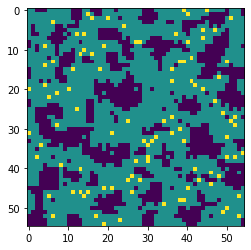

Running simulation with 0.0 pbwl value.


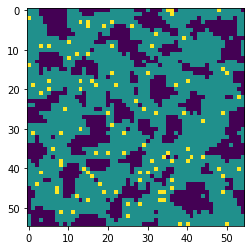

Running simulation with 0.0 pbwl value.


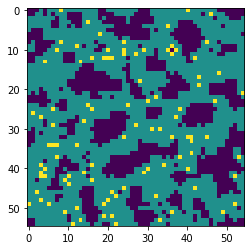

Running simulation with 0.0 pbwl value.


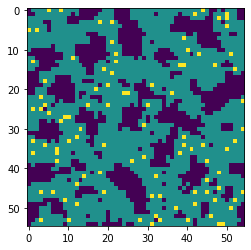

Running simulation with 0.0 pbwl value.


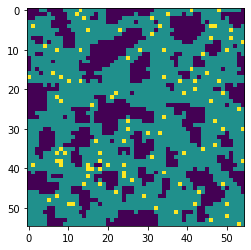

[6246 6466 6590 6524 6624]
Running simulation with 0.1 pbwl value.


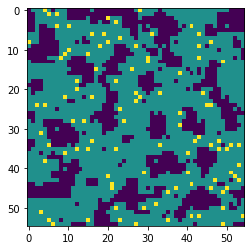

Running simulation with 0.1 pbwl value.


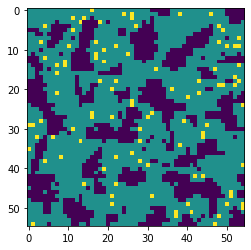

Running simulation with 0.1 pbwl value.


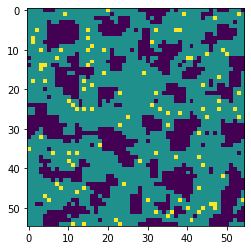

Running simulation with 0.1 pbwl value.


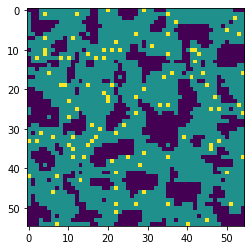

Running simulation with 0.1 pbwl value.


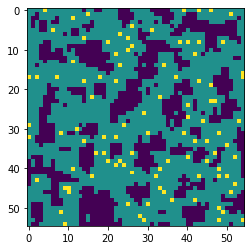

[6644 6492 6532 6492 6276]
Running simulation with 0.2 pbwl value.


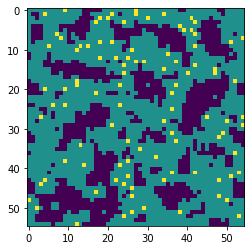

Running simulation with 0.2 pbwl value.


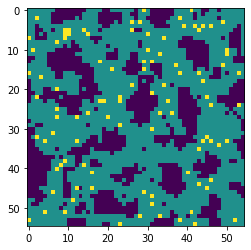

Running simulation with 0.2 pbwl value.


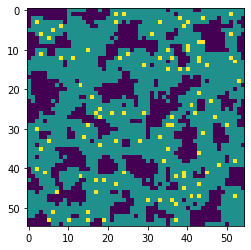

Running simulation with 0.2 pbwl value.


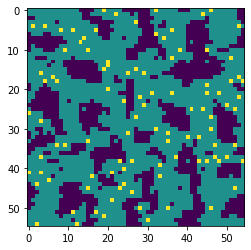

Running simulation with 0.2 pbwl value.


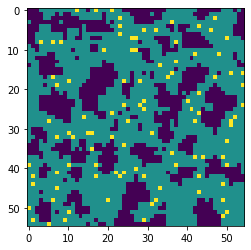

[6502 6720 6318 6652 6530]
Running simulation with 0.3 pbwl value.


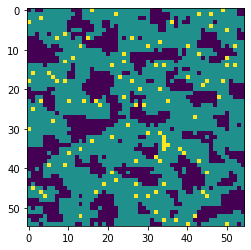

Running simulation with 0.3 pbwl value.


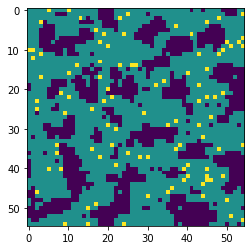

Running simulation with 0.3 pbwl value.


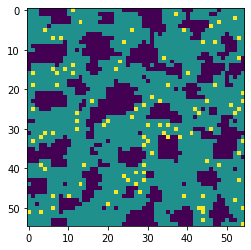

Running simulation with 0.3 pbwl value.


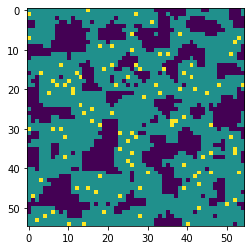

Running simulation with 0.3 pbwl value.


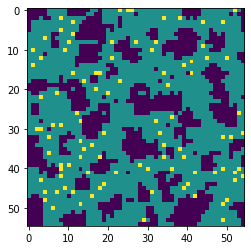

[6174 6636 6680 6748 6630]
Running simulation with 0.4 pbwl value.


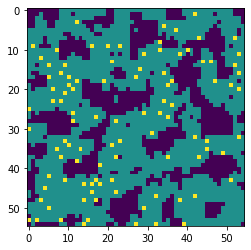

Running simulation with 0.4 pbwl value.


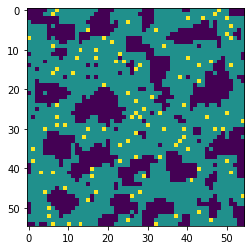

Running simulation with 0.4 pbwl value.


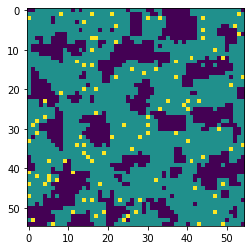

Running simulation with 0.4 pbwl value.


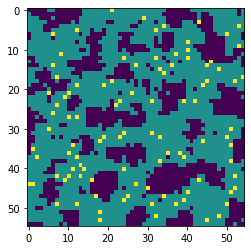

Running simulation with 0.4 pbwl value.


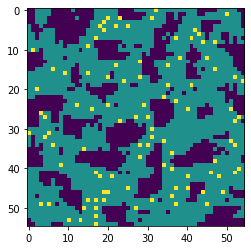

[6726 6864 6734 6628 6724]
Running simulation with 0.5 pbwl value.


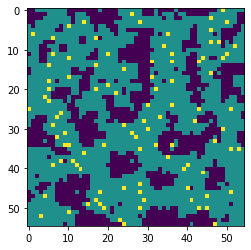

Running simulation with 0.5 pbwl value.


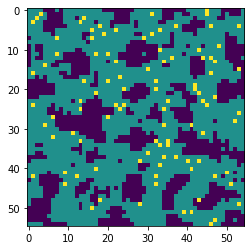

Running simulation with 0.5 pbwl value.


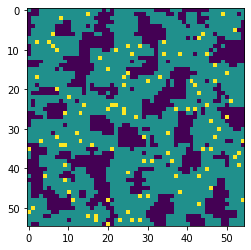

Running simulation with 0.5 pbwl value.


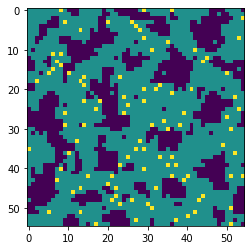

Running simulation with 0.5 pbwl value.


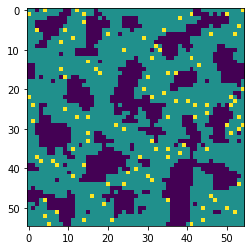

[6666 6550 6546 6826 7140]
Running simulation with 0.6 pbwl value.


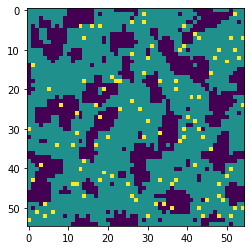

Running simulation with 0.6 pbwl value.


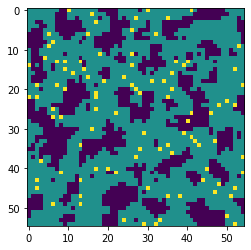

Running simulation with 0.6 pbwl value.


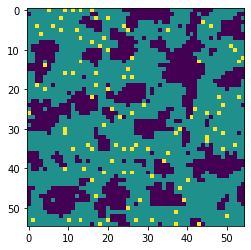

Running simulation with 0.6 pbwl value.


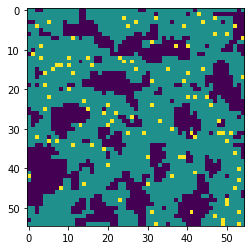

Running simulation with 0.6 pbwl value.


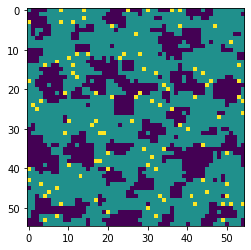

[6870 6558 6684 6762 6470]
Running simulation with 0.7 pbwl value.


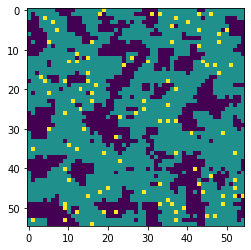

Running simulation with 0.7 pbwl value.


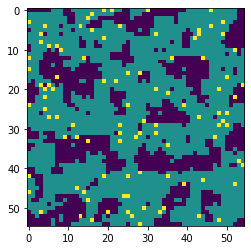

Running simulation with 0.7 pbwl value.


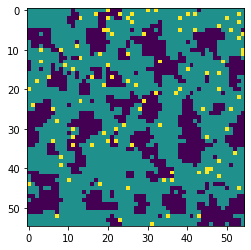

Running simulation with 0.7 pbwl value.


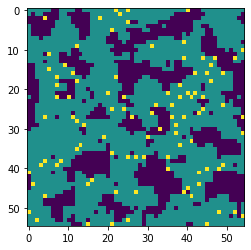

Running simulation with 0.7 pbwl value.


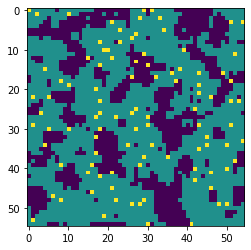

[6642 6748 6694 6968 6794]
Running simulation with 0.8 pbwl value.


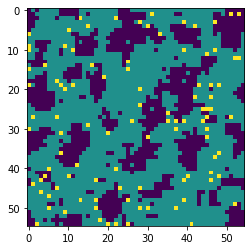

Running simulation with 0.8 pbwl value.


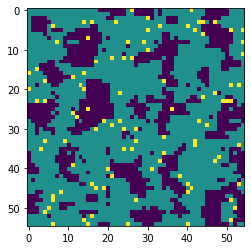

Running simulation with 0.8 pbwl value.


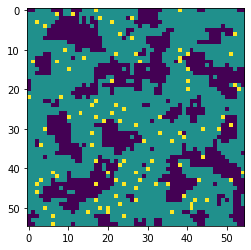

Running simulation with 0.8 pbwl value.


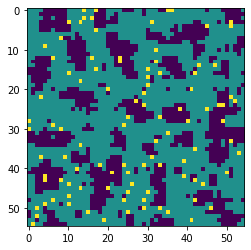

Running simulation with 0.8 pbwl value.


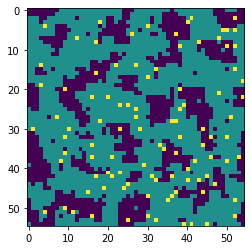

[6922 6702 6880 6442 6736]
Running simulation with 0.9 pbwl value.


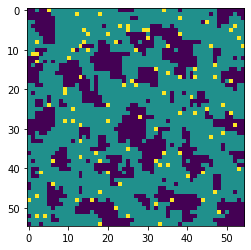

Running simulation with 0.9 pbwl value.


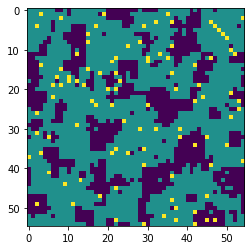

Running simulation with 0.9 pbwl value.


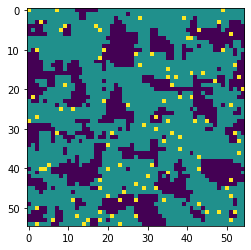

Running simulation with 0.9 pbwl value.


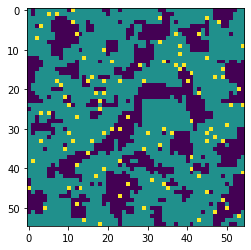

Running simulation with 0.9 pbwl value.


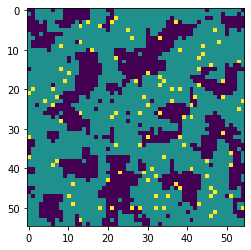

[6604 6714 6532 6484 6986]
Running simulation with 1.0 pbwl value.


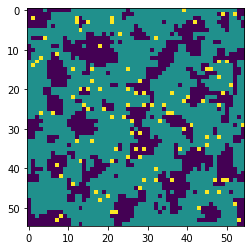

Running simulation with 1.0 pbwl value.


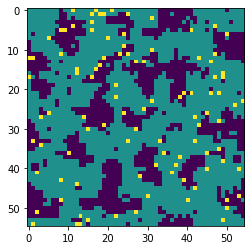

Running simulation with 1.0 pbwl value.


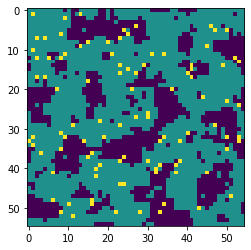

Running simulation with 1.0 pbwl value.


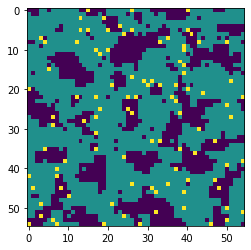

Running simulation with 1.0 pbwl value.


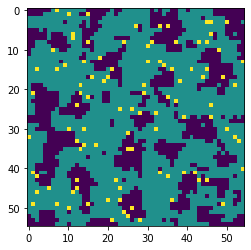

[6402 6804 6988 6680 6728]
pbwl value: 0.0
Average: 6490.0
Standard Deviation: 133.58443023047258

pbwl value: 0.1
Average: 6487.2
Standard Deviation: 119.36900770300471

pbwl value: 0.2
Average: 6544.4
Standard Deviation: 138.32946179321308

pbwl value: 0.3
Average: 6573.6
Standard Deviation: 204.20146914260926

pbwl value: 0.4
Average: 6735.2
Standard Deviation: 75.22340061443646

pbwl value: 0.5
Average: 6745.6
Standard Deviation: 222.01405360922539

pbwl value: 0.6
Average: 6668.8
Standard Deviation: 142.26510464622027

pbwl value: 0.7
Average: 6769.2
Standard Deviation: 111.73253778555286

pbwl value: 0.8
Average: 6736.4
Standard Deviation: 169.06992636184592

pbwl value: 0.9
Average: 6664.0
Standard Deviation: 178.66616915353617

pbwl value: 1.0
Average: 6720.4
Standard Deviation: 190.61332587203867



In [3]:
from analysis import count_neighbours
 
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 5

all_results = {pbwl: [] for pbwl in pbwl_values}
total_molecules = 2087 # 55x55x0.69

for pbwl_value in pbwl_values:
    
    pbwl_results = []

    for run in range(runs):
        print(f"Running simulation with {pbwl_value} pbwl value.")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=0.4, pbwl=pbwl_value, pbl_parameter=False, pbwl_parameter=True)

        final_grid = ca_rules.generate_simulation(pbwl=pbwl_value, pbw=0.4)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbwl_results.append(count)

        plt.imshow(final_grid)
        plt.show()

    pbwl_results = np.array(pbwl_results)
    print(pbwl_results)

    average_results = np.mean(pbwl_results, axis=0)
    std_dev_results = np.std(pbwl_results, axis=0)

    all_results[pbwl_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbwl_value, data in all_results.items():
    print(f"pbwl value: {pbwl_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

### Pb(WL) Aangepast 

Pb(WL) = 0.1
[6246 6466 6590 6524 6624] 

Pb(WL) =0.1
[6644 6492 6532 6492 6276]

Pb(WL) =0.2
[6502 6720 6318 6652 6530]

Pb(WL) =0.3 
[6174 6636 6680 6748 6630]

Pb(WL) =0.4 
[6726 6864 6734 6628 6724]

Pb(WL) =0.5
[6666 6550 6546 6826 7140]

Pb(WL) =0.6
[6870 6558 6684 6762 6470]

Pb(WL) =0.7
[6642 6748 6694 6968 6794]

Pb(WL) =0.8
[6922 6702 6880 6442 6736]

Pb(WL) =0.9
[6604 6714 6532 6484 6986]

Pb(WL) =1.0
[6402 6804 6988 6680 6728]


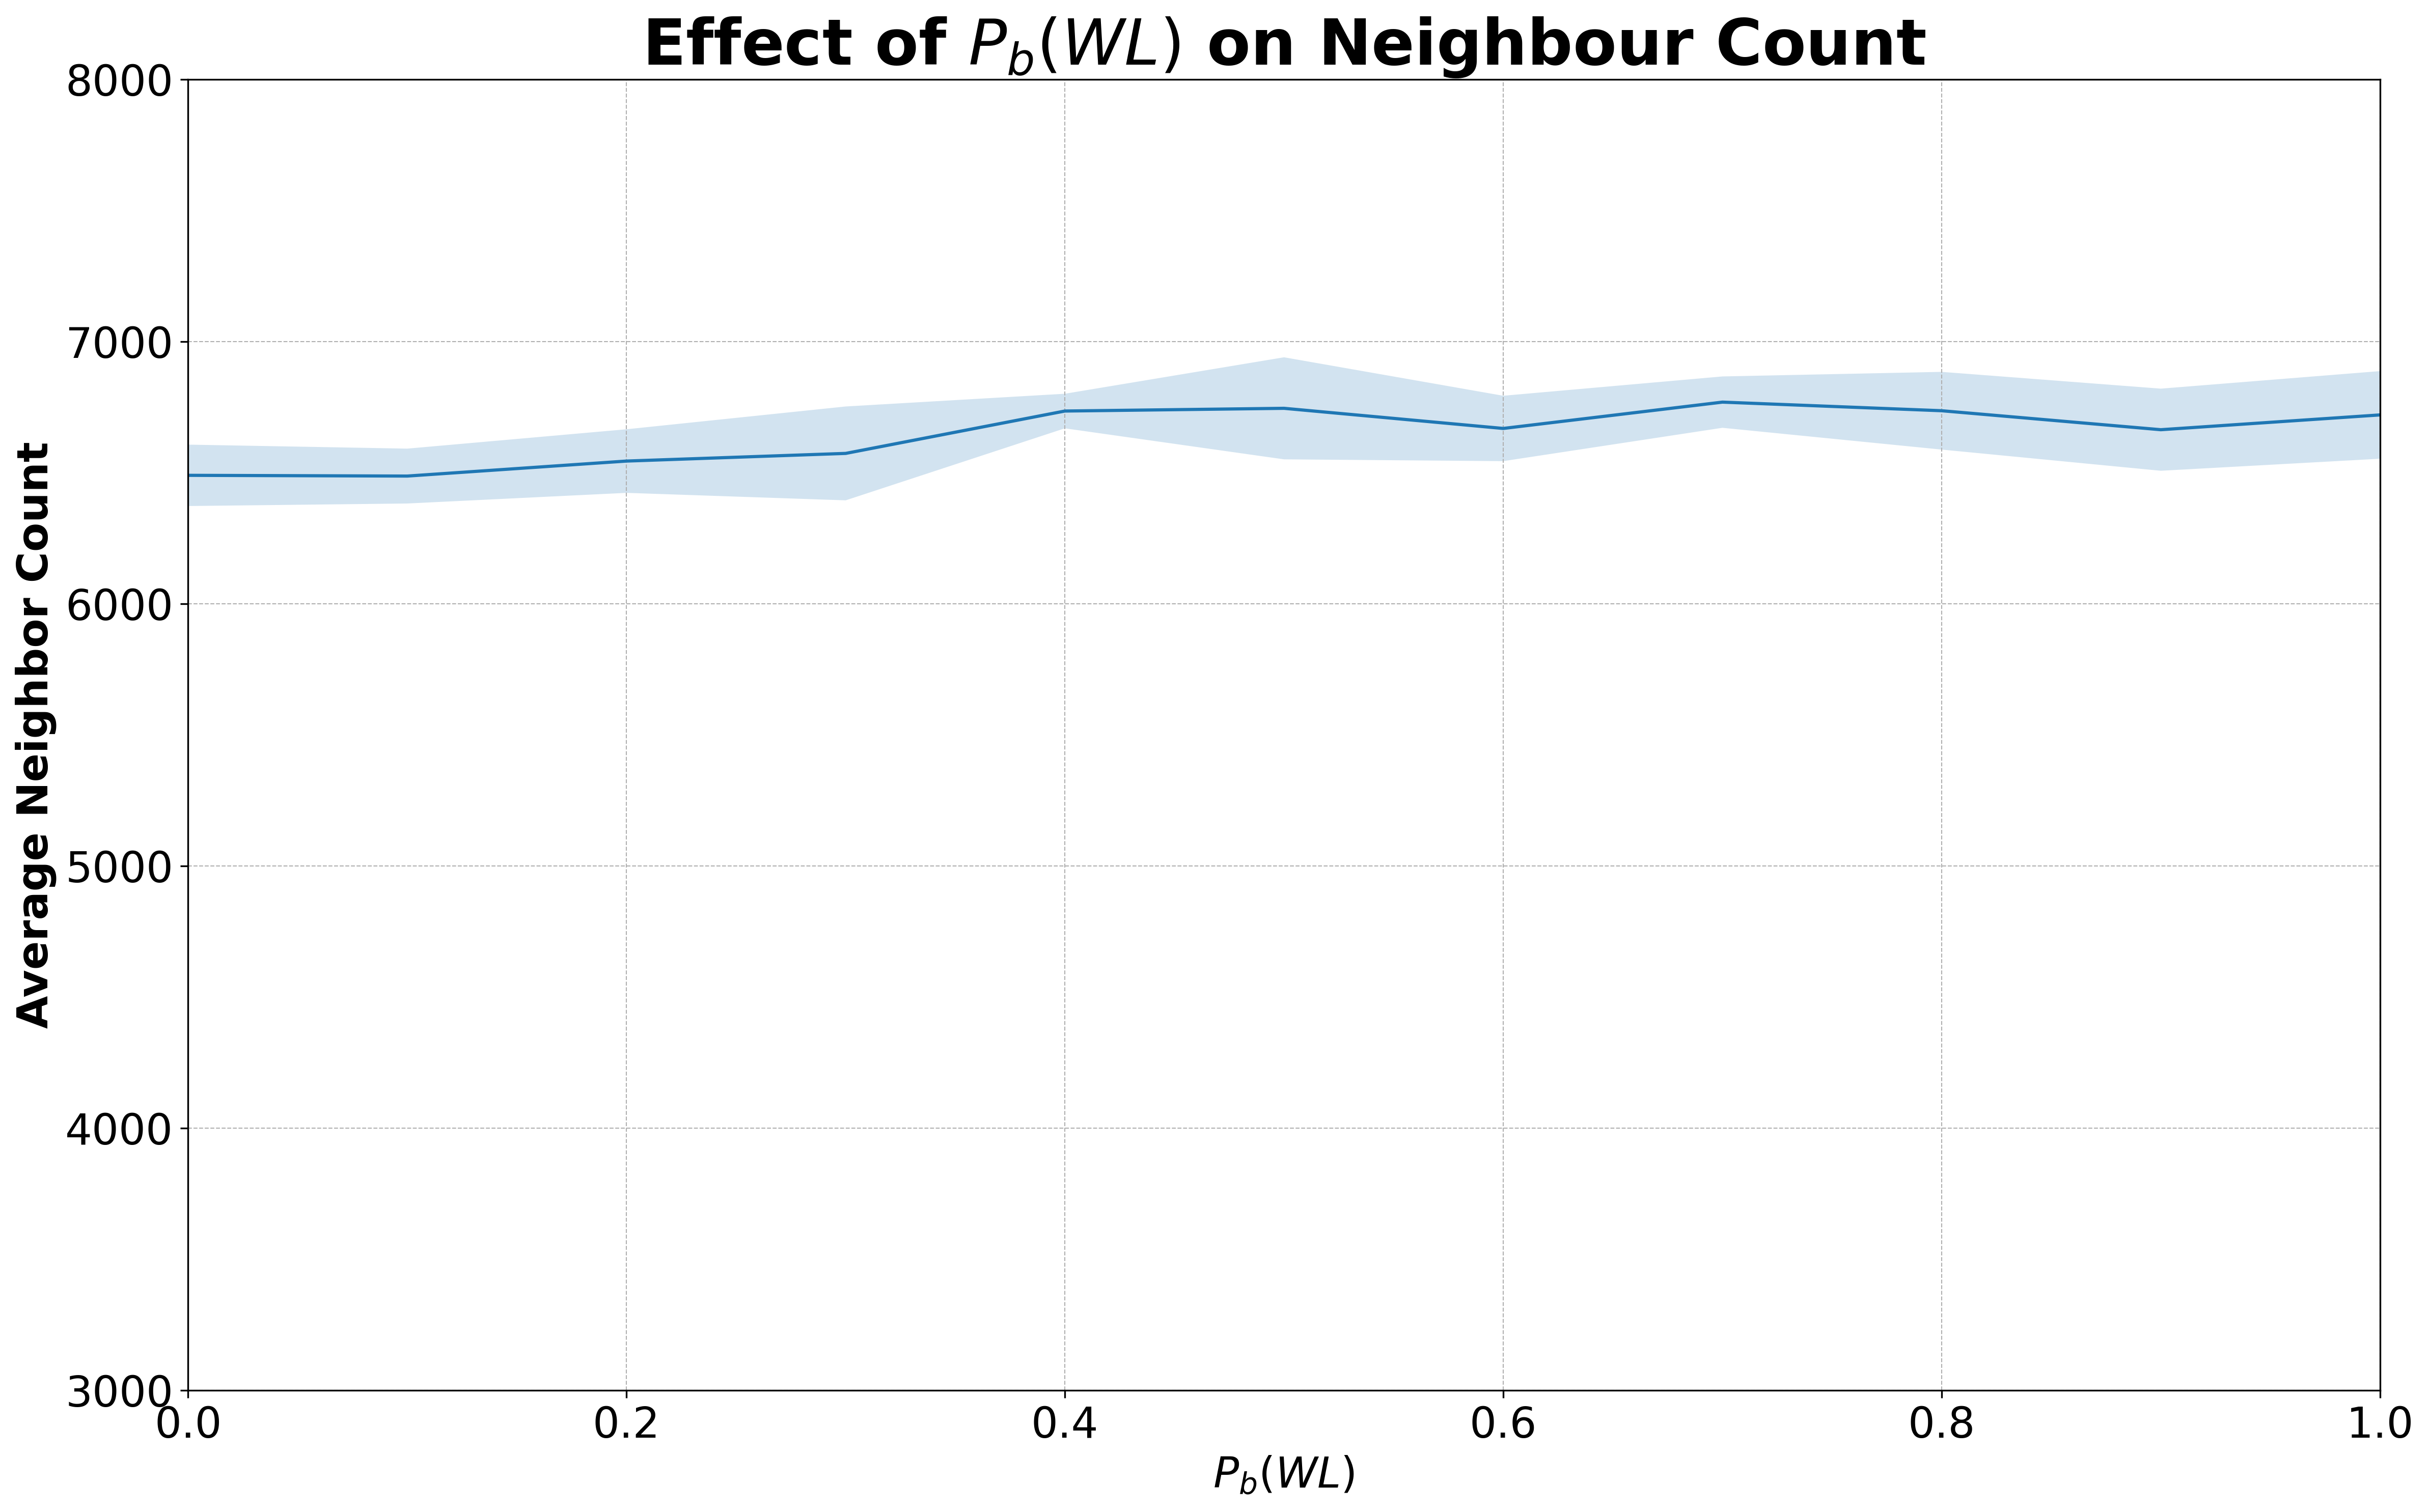

In [10]:
pbwl_values_percent = [value for value in pbwl_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[pbwl]['average'] for pbwl in pbwl_values]
std_devs = [all_results[pbwl]['std_dev'] for pbwl in pbwl_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

# Plotting
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(pbwl_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbwl_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlim([0, 1])
plt.ylim([3000, 8000])
plt.xlabel('$P_b(WL)$', fontsize=20, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=20, fontweight='bold')
plt.title('Effect of $P_b(WL)$ on Neighbour Count', fontsize=30, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Varying concentration and $P_B(WL)$

In [34]:
from analysis import count_neighbours
 
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
solute_concentrations = [ 100, 200, 400, 600, 800]

results = []

runs = 1

all_results = {pbwl: {} for pbwl in pbwl_values}

for pbwl_value in pbwl_values:
    for solute_concentration in solute_concentrations:
    
        pbwl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbwl_value} pbwl value and {solute_concentration} solute concentration.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbwl=pbwl_value, pbl_parameter=False, pbwl_parameter=True)

            final_grid = ca_rules.generate_simulation(pbwl=pbwl_value, pbw=0.4)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbwl_results.append(count)

        pbwl_results = np.array(pbwl_results)
        print(pbwl_results)

        # Statistics for change in pbw;
        average_results_pbwl = np.mean(pbwl_results, axis=0) 
        std_dev_results_pbwl = np.std(pbwl_results, axis=0)

        all_results[pbwl_value][solute_concentration] = {
            'average': average_results_pbwl,
            'std_dev': std_dev_results_pbwl
        }

for pbwl_value, data in all_results.items():
    for solute_concentration, data in data.items():
        print(f"pbwl value: {pbwl_value}")
        print(f"Solute concentration: {solute_concentration}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()


Running simulation with 0.0 pbwl value and 100 solute concentration.
[6314]
Running simulation with 0.0 pbwl value and 200 solute concentration.
[5204]
Running simulation with 0.0 pbwl value and 400 solute concentration.
[3018]
Running simulation with 0.0 pbwl value and 600 solute concentration.
[1616]
Running simulation with 0.0 pbwl value and 800 solute concentration.
[722]
Running simulation with 0.25 pbwl value and 100 solute concentration.
[6558]
Running simulation with 0.25 pbwl value and 200 solute concentration.
[5696]
Running simulation with 0.25 pbwl value and 400 solute concentration.
[4246]
Running simulation with 0.25 pbwl value and 600 solute concentration.
[4056]
Running simulation with 0.25 pbwl value and 800 solute concentration.
[3584]
Running simulation with 0.5 pbwl value and 100 solute concentration.
[6966]
Running simulation with 0.5 pbwl value and 200 solute concentration.
[5840]
Running simulation with 0.5 pbwl value and 400 solute concentration.
[4782]
Running 

In [35]:
pbwl_list = []
concentration_list = []
average_list = []

for pbwl_value, data in all_results.items():
    for solute_concentration, data in data.items():
        pbwl = pbwl_value
        concentration = solute_concentration
        average = data['average']
        
        pbwl_list.append(pbwl)
        concentration_list.append(concentration)
        average_list.append(average)

print("pbwl_list:", pbwl_list)
print("concentration_list:", concentration_list)
print("average_list:", average_list)

pbwl_list: [0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0]
concentration_list: [100, 200, 400, 600, 800, 100, 200, 400, 600, 800, 100, 200, 400, 600, 800, 100, 200, 400, 600, 800, 100, 200, 400, 600, 800]
average_list: [6314.0, 5204.0, 3018.0, 1616.0, 722.0, 6558.0, 5696.0, 4246.0, 4056.0, 3584.0, 6966.0, 5840.0, 4782.0, 3852.0, 3602.0, 6826.0, 5680.0, 4380.0, 3506.0, 2766.0, 6498.0, 5912.0, 4430.0, 3152.0, 2684.0]


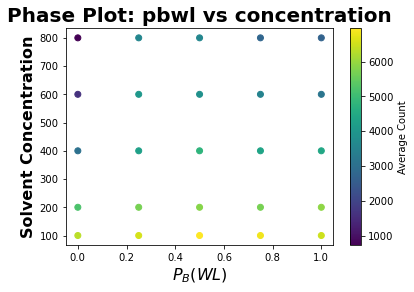

In [36]:
import matplotlib.pyplot as plt

plt.scatter(pbwl_list, concentration_list, c=average_list, cmap='viridis')
plt.xlabel('$P_B(WL)$', fontsize=16, fontweight='bold')
plt.ylabel('Solvent Concentration', fontsize=16, fontweight='bold')
plt.title('Phase Plot: pbwl vs concentration', fontsize=20, fontweight='bold')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Average Count')

plt.show()


In [27]:
pbwl_values_percent = [value for value in pbwl_values]  # Convert to percentage

# Extract averages_pbwl and standard deviations for plotting
averages_pbwl = [all_results[pbwl]['average'] for pbwl in pbwl_values]
std_devs_pbwl = [all_results[pbwl]['std_dev'] for pbwl in pbwl_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs_pbwl) / np.sqrt(num_runs)  # Pbwl

# Calculate lower and upper bounds for the confidence interval
lower_bound_pbwl = np.array(averages_pbwl) - confidence_interval
upper_bound_pbwl = np.array(averages_pbwl) + confidence_interval

# Plotting
plt.figure(figsize=(16, 10), dpi=300)

for pbwl_value, data in all_results.items():
    solute_concentrations = data['solute_concentration']
    counts = data['average']
    plt.plot(np.full_like(solute_concentrations, pbwl_value), counts, 'o', color='blue', label=f'Pb(WL)={pbwl_value}')


plt.xlabel('$P_b(WL)$', fontsize=20, fontweight='bold')
plt.ylabel('Solute Concentration', fontsize=20, fontweight='bold')
plt.title('Phase Plot: $P_b(WL)$ vs Solute Concentration', fontsize=30, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


KeyError: 'average'

In [24]:
from analysis import calculate_attributes

solute_concentrations = [0, 50] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
for solute_amount in solute_concentrations:
    print(f"Running simulation with {solute_amount} solute molecules.")
    ca_grid = CA_grid(solute_amount=solute_amount)
    ca_rules = CA_rules(ca_grid)
    final_grid = ca_rules.generate_simulation()

    f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
    output = np.array([f_o, f_1, f_2, f_3, f_4])
    results.append(output)

results = np.array(results)
print(results)


Running simulation with 0 solute molecules.
Running simulation with 50 solute molecules.
[[0.0005 0.0155 0.122  0.3645 0.4975]
 [0.001  0.023  0.1535 0.352  0.4455]]


In [25]:
print(results.T[0])

[0.0005 0.001 ]


In [1]:

plt.plot(solute_concentrations, results.T[0], label='$f_0$')
plt.plot(solute_concentrations, results.T[1], label='$f_1$')
plt.plot(solute_concentrations, results.T[2], label='$f_2$')
plt.plot(solute_concentrations, results.T[3], label='$f_3$')
plt.plot(solute_concentrations, results.T[4], label='$f_4$')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

### Counting of unbound water molecules